# BST - Benchmarks

In [361]:
# using Revise
# using BenchmarkTools
# using DataFrames
# using DataFramesMeta
# using Plots
# using Random
# using Unitful
# using UnitfulRecipes
# using Formatting
# using Latexify

In [362]:

# include("../src/MyBST.jl")
# include("../src/MyV.jl")
# include("../src/SortingAlgo.jl")
# include("../src/SearchingAlgo.jl")

# using .MyBST
# using .MyV
# using .SortingAlgo
# using .SearchingAlgo

In [363]:
# k = 3   # size k
# n = 10  # random values from 1 to n

# test_vector = MyV.createrandomvector(k, n)
# SortingAlgo.insertionsort!(test_vector)
# test_bst = MyBST.createBST(test_vector)

# # Assertion
# for i in eachindex(test_vector)
#     @assert MyBST.lookup(test_bst, i) == test_vector[i]
# end

# # Debug prints
# println("Length of test vector: ", length(test_vector))
# println("Size of test BST: ", length(test_bst))

# println("Test vector: ", test_vector)
# println("Test bst: ", test_bst)
# println()


# for element ∈ test_bst
#     println(element)
# end

In [364]:

"""
    bstree_bsvector_bench(n, k)

A benchmark function comparing the lookup algorithm to binary search. 
Returns a tuple containg 
- n nbr of elements in list, 
- k nbr of searches (i.e. lookup and binary_search),
- elapsed time in nanoseconds for lookup on a BTS,
- elapsed time in nanoseconds for Binary search on a vector

# Arguments
- `n`: Number of elements in list
- `k`: Number of operations 
"""
# function bstree_bsvector_bench(n, k)
#     sequence = MyV.createrandomvector(k, n)
#     v = MyV.createrandomvector(n, n)
#     SortingAlgo.insertionsort!(v)
#     bst = MyBST.createBST(v)

#     # v_time = @elapsed begin
#     v_time = @timed begin
#         for i in eachindex(sequence)
#             SearchingAlgo.binary_search(v, sequence[i])
#         end
#     end

#     # bst_time = @elapsed begin
#     bst_time = @timed begin
#         for i in eachindex(sequence)
#             MyBST.binary_search(bst, sequence[i])
#         end
#     end

#     # lookup_time = @elapsed begin
#     lookup_time = @timed begin
#         for i in eachindex(sequence)
#             MyBST.lookup(bst, sequence[i])
#         end
#     end

#     # return n, k, v_time, bst_time # ns # when using @elapsed
#     # return n, k, v_time[2], bst_time[2] # when using @timed
#     # return n, k, minimum(v_time).time, minimum(bst_time).time, minimum(v_time).memory, minimum(bst_time).memory  # when using @timed
#     return n, (v_time[2]/k), (lookup_time[2]/k), (bst_time[2]/k) # when using @timed
# end

"    bstree_bsvector_bench(n, k)\n\nA benchmark function comparing the lookup algorithm to binary search. \nReturns a tuple containg \n- n nbr of elements in list, \n- k nbr of searches (i.e. lookup and binary_search),\n- elapsed time in nanoseconds for lookup on a BTS,\n- elapsed time in nanoseconds for Binary search on a vector\n\n# Arguments\n- `n`: Number of elements in list\n- `k`: Number of operations \n"

In [365]:
k = 10000 # k operations

bench_results = Vector(undef, 0)
for n = 100:100:1000
    push!(bench_results, bstree_bsvector_bench(n, k))
end

In [366]:
for timed_operations ∈ bench_results
    println(timed_operations)
end

(100, 4.94338e-8, 4.22618e-8, 1.609072e-7)
(200, 6.30882e-8, 5.4481400000000005e-8, 2.794628e-7)
(300, 6.49803e-8, 5.59263e-8, 3.774206e-7)
(400, 5.5698800000000004e-8, 6.261809999999999e-8, 3.8560640000000004e-7)
(500, 6.48991e-8, 6.62023e-8, 4.335245e-7)
(600, 7.32148e-8, 5.5950900000000004e-8, 3.796471e-7)
(700, 6.28341e-8, 6.66651e-8, 4.086475e-7)
(800, 7.20635e-8, 7.06398e-8, 5.166172e-7)
(900, 6.34492e-8, 6.92419e-8, 5.044914e-7)
(1000, 7.21924e-8, 7.54129e-8, 5.697037e-7)


In [367]:

# Dataframe
# df = DataFrame([[bench_results[k][kk] for k in 1:length(bench_results)] for kk in 1:length(bench_results[1])], [:n, :k, :Vector, :BST])
df = DataFrame([[bench_results[k][kk] for k in 1:length(bench_results)] for kk in 1:length(bench_results[1])], [:n, :bs_v, :lookup_bst, :bs_bst])

,n,bs_v,lookup_bst,bs_bst
,Int64,Float64,Float64,Float64
1,100,4.94338e-8,4.22618e-8,1.60907e-7
2,200,6.30882e-8,5.44814e-8,2.79463e-7
3,300,6.49803e-8,5.59263e-8,3.77421e-7
4,400,5.56988e-8,6.26181e-8,3.85606e-7
5,500,6.48991e-8,6.62023e-8,4.33524e-7
6,600,7.32148e-8,5.59509e-8,3.79647e-7
7,700,6.28341e-8,6.66651e-8,4.08647e-7
8,800,7.20635e-8,7.06398e-8,5.16617e-7
9,900,6.34492e-8,6.92419e-8,5.04491e-7


In [368]:

# Data manipulation functions
f_ratio = (x, y) -> x/y

f_readable_n = x -> format(x, commas=false, autoscale=:finance, precision=0)

# u stands for unit and ns for nanoseconds
f_readable_time = x -> x*u"s" |> x -> round(typeof(1u"ns"), x)

# f_readable_time = x -> round(x, digits = 2) |> x -> x*u"ns" 

f_readable_ratio = x -> round(x, digits = 1)

#333 (generic function with 1 method)

In [369]:

# Testing that the formatting works properly
t_example = f_readable_time(0.45555000)
n_example = f_readable_n(4564655)
r_example = f_readable_ratio(2.4555)
println(t_example)
println(n_example)
println(r_example)

455550000 ns
5m
2.5


In [370]:
# Data Transformations
df_trans = @transform(df, :Ratio = f_ratio.(:bs_v,:lookup_bst))
@transform!(df_trans, :Growth_Ratio_bs_v = f_ratio.(:bs_v, :bs_v[1]))
@transform!(df_trans, :Growth_Ratio_lookup_bst = f_ratio.(:lookup_bst, :lookup_bst[1]))
@transform!(df_trans, :Growth_Ratio_bs_bst = f_ratio.(:bs_bst, :bs_bst[1]));

# Data formatting
df_trans[!,:n] = f_readable_n.(df_trans[:,:n])
# df_trans[!,:k] = f_readable_n.(df_trans[:,:k])
df_trans[!,:bs_v] = f_readable_time.(df_trans[:,:bs_v])
df_trans[!,:lookup_bst] = f_readable_time.(df_trans[:,:lookup_bst])
df_trans[!,:bs_bst] = f_readable_time.(df_trans[:,:bs_bst])
df_trans[!,:Ratio] = f_readable_ratio.(df_trans[:,:Ratio])
df_trans[!,:Growth_Ratio_bs_v] = f_readable_ratio.(df_trans[:,:Growth_Ratio_bs_v])
df_trans[!,:Growth_Ratio_lookup_bst] = f_readable_ratio.(df_trans[:,:Growth_Ratio_lookup_bst])
df_trans[!,:Growth_Ratio_bs_bst] = f_readable_ratio.(df_trans[:,:Growth_Ratio_bs_bst]);

In [371]:
# Quick-check
df_trans

,n,bs_v,lookup_bst,bs_bst,Ratio,Growth_Ratio_bs_v,Growth_Ratio_lookup_bst
,String,Quantity…,Quantity…,Quantity…,Float64,Float64,Float64
1,100,49 ns,42 ns,161 ns,1.2,1.0,1.0
2,200,63 ns,54 ns,279 ns,1.2,1.3,1.3
3,300,65 ns,56 ns,377 ns,1.2,1.3,1.3
4,400,56 ns,63 ns,386 ns,0.9,1.1,1.5
5,500,65 ns,66 ns,434 ns,1.0,1.3,1.6
6,600,73 ns,56 ns,380 ns,1.3,1.5,1.3
7,700,63 ns,67 ns,409 ns,0.9,1.3,1.6
8,800,72 ns,71 ns,517 ns,1.0,1.5,1.7
9,900,63 ns,69 ns,504 ns,0.9,1.3,1.6


In [372]:
# k = 1000
# n = 1000
# sequence = MyV.createrandomvector(k, n*10)
# v = MyV.createrandomvector(n, n*10)
# SortingAlgo.insertionsort!(v)
# bst = MyBST.createBST(v)
#  # v_time = @timed begin
# v_time = @benchmark begin
#     for i in eachindex(sequence)
#         SearchingAlgo.binary_search(v, sequence[i])
#         MyBST.lookup(bst, sequence[i])
#         MyBST.binary_search(bst, sequence[i])
#     end
# end

In [373]:
# v_time

In [374]:
# v_time = @enchmark begin
#     for i in eachindex(sequence)
#         SearchingAlgo.binary_search(v, sequence[i])
#     end
# end

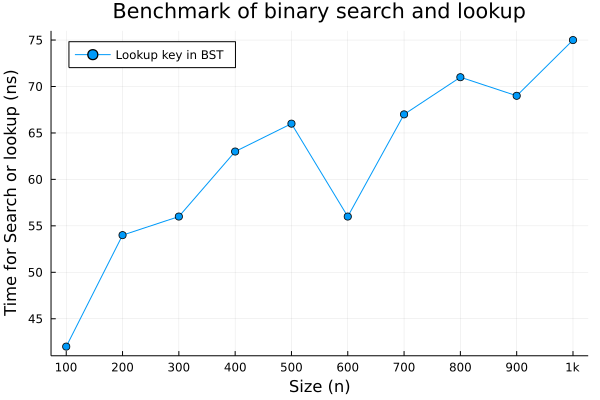

In [375]:
tree_fig1 = plot(df_trans[:,:n], df_trans[:,:lookup_bst],
    xlabel = "Size (n)",
    ylabel = "Time for Search or lookup",
    title = "Benchmark of binary search and lookup",
    label = "Lookup key in BST",
    legend = :topleft,
    shape = :circle)

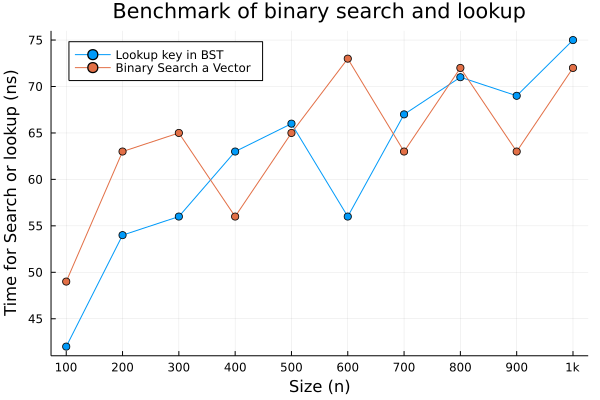

In [376]:

tree_fig1 = plot!(df_trans[:,:n], df_trans[:,:bs_v],
    label = "Binary Search a Vector",
    legend = :topleft,
    shape = :circle)

In [377]:

filepath = pwd()
savefig(tree_fig1,filepath*"/output/tree_fig1v9small.pdf")

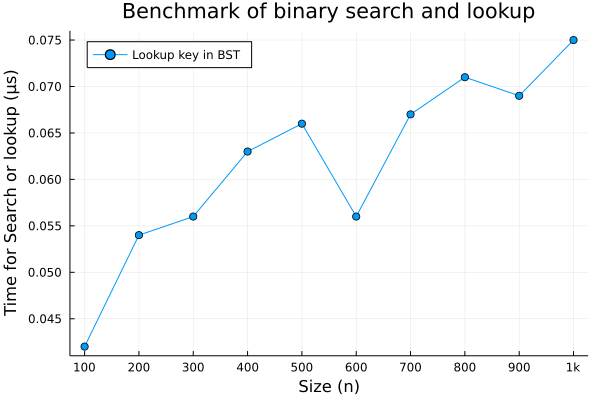

In [378]:

tree_fig2 = plot(df_trans[:,:n], df_trans[:,:lookup_bst],
    yunit=u"μs",
    xlabel = "Size (n)",
    ylabel = "Time for Search or lookup",
    title = "Benchmark of binary search and lookup",
    label = "Lookup key in BST",
    legend = :topleft,
    shape = :circle)


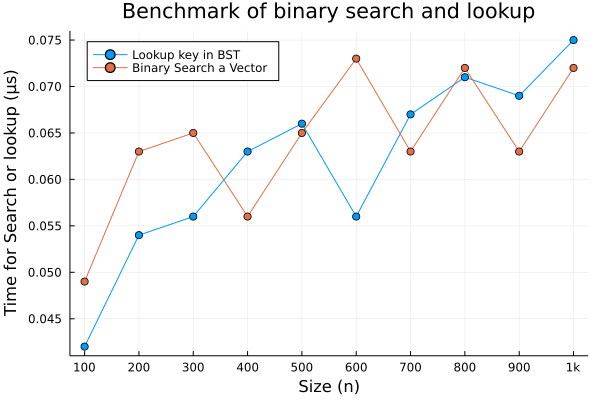

In [379]:

tree_fig2 = plot!(df_trans[:,:n], df_trans[:,:bs_v],
    yunit=u"μs",
    label = "Binary Search a Vector",
    legend = :topleft,
    shape = :circle)

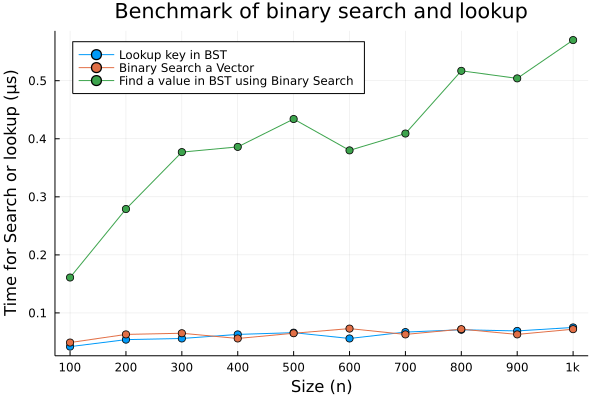

In [380]:

tree_fig2 = plot!(df_trans[:,:n], df_trans[:,:bs_bst],
    yunit=u"μs",
    label = "Find a value in BST using Binary Search",
    legend = :topleft,
    shape = :circle)

In [381]:

savefig(tree_fig2,filepath*"/output/tree_fig2v9small.pdf")

In [382]:
latexify(df_trans, env=:tabular) |> print

\begin{tabular}{cccccccc}
$n$ & $bs_{v}$ & $lookup_{bst}$ & $bs_{bst}$ & $Ratio$ & $Growth_{Ratio\_bs\_v}$ & $Growth_{Ratio\_lookup\_bst}$ & $Growth_{Ratio\_bs\_bst}$\\
$100$ & $49 ns$ & $42 ns$ & $161 ns$ & $1.2$ & $1.0$ & $1.0$ & $1.0$\\
$200$ & $63 ns$ & $54 ns$ & $279 ns$ & $1.2$ & $1.3$ & $1.3$ & $1.7$\\
$300$ & $65 ns$ & $56 ns$ & $377 ns$ & $1.2$ & $1.3$ & $1.3$ & $2.3$\\
$400$ & $56 ns$ & $63 ns$ & $386 ns$ & $0.9$ & $1.1$ & $1.5$ & $2.4$\\
$500$ & $65 ns$ & $66 ns$ & $434 ns$ & $1.0$ & $1.3$ & $1.6$ & $2.7$\\
$600$ & $73 ns$ & $56 ns$ & $380 ns$ & $1.3$ & $1.5$ & $1.3$ & $2.4$\\
$700$ & $63 ns$ & $67 ns$ & $409 ns$ & $0.9$ & $1.3$ & $1.6$ & $2.5$\\
$800$ & $72 ns$ & $71 ns$ & $517 ns$ & $1.0$ & $1.5$ & $1.7$ & $3.2$\\
$900$ & $63 ns$ & $69 ns$ & $504 ns$ & $0.9$ & $1.3$ & $1.6$ & $3.1$\\
$1 \cdot k$ & $72 ns$ & $75 ns$ & $570 ns$ & $1.0$ & $1.5$ & $1.8$ & $3.5$\\
\end{tabular}
